In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [6]:
y_train.shape

(33600, 10)

In [7]:
def neural_net(drop_val):
    classifier = Sequential()
    
    classifier.add(Dense(16,activation='relu'))
    classifier.add(Dropout(drop_val))
    classifier.add(Dense(16,activation='relu'))
    classifier.add(Dropout(drop_val))
    classifier.add(Dense(10,activation='sigmoid'))
    
    classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    eps = 100
    model = classifier.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))
    eva = classifier.evaluate(X_test,y_test)
    acc = np.round(eva[1]*100,2)
    return acc

In [8]:
drop_vals = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
acc_scores = []
for vals in drop_vals:
    score = neural_net(vals)
    acc_scores.append(score)

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 2.9141 - accuracy: 0.3733 - val_loss: 1.4310 - val_accuracy: 0.4952
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 1.3220 - accuracy: 0.5328 - val_loss: 1.2430 - val_accuracy: 0.5832
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1009 - accuracy: 0.6286 - val_loss: 1.0016 - val_accuracy: 0.6562
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9434 - accuracy: 0.6927 - val_loss: 0.8462 - val_accuracy: 0.7421
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.8017 - accuracy: 0.7482 - val_loss: 0.7349 - val_accuracy: 0.7750
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.8103 - val_loss: 0.5772 - val_accuracy: 0.8387
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.8475 - val_loss: 0.5346 - val_accuracy: 0.8554

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1562 - accuracy: 0.9565 - val_loss: 0.3672 - val_accuracy: 0.9260
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1444 - accuracy: 0.9597 - val_loss: 0.3799 - val_accuracy: 0.9263
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9600 - val_loss: 0.3605 - val_accuracy: 0.9234
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9589 - val_loss: 0.3836 - val_accuracy: 0.9262
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9590 - val_loss: 0.4090 - val_accuracy: 0.9195
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1391 - accuracy: 0.9602 - val_loss: 0.4213 - val_accuracy: 0.9283
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1420 - accuracy: 0.9587 - val_loss: 0.4264 - val_accuracy:

840/840 [==============================] - 1s 2ms/step - loss: 0.7669 - accuracy: 0.7626 - val_loss: 0.5318 - val_accuracy: 0.8461
Epoch 15/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7453 - accuracy: 0.7678 - val_loss: 0.5325 - val_accuracy: 0.8350
Epoch 16/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7491 - accuracy: 0.7683 - val_loss: 0.4998 - val_accuracy: 0.8591
Epoch 17/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7329 - accuracy: 0.7749 - val_loss: 0.5336 - val_accuracy: 0.8601
Epoch 18/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7303 - accuracy: 0.7750 - val_loss: 0.5037 - val_accuracy: 0.8643
Epoch 19/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7269 - accuracy: 0.7734 - val_loss: 0.5255 - val_accuracy: 0.8531
Epoch 20/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7265 - accuracy: 0.7767 - val_loss: 0.5281 - val_accuracy: 0.8476
Epoch

Epoch 71/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6639 - accuracy: 0.7903 - val_loss: 0.5020 - val_accuracy: 0.8554
Epoch 72/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6583 - accuracy: 0.7943 - val_loss: 0.5072 - val_accuracy: 0.8635
Epoch 73/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6539 - accuracy: 0.7966 - val_loss: 0.5283 - val_accuracy: 0.8458
Epoch 74/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6542 - accuracy: 0.7969 - val_loss: 0.4921 - val_accuracy: 0.8655
Epoch 75/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6568 - accuracy: 0.7943 - val_loss: 0.4996 - val_accuracy: 0.8637
Epoch 76/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6568 - accuracy: 0.7959 - val_loss: 0.4936 - val_accuracy: 0.8597
Epoch 77/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6523 - accuracy: 0.7955 - val_loss: 0.5034 - val_accuracy:

840/840 [==============================] - 1s 2ms/step - loss: 1.6006 - accuracy: 0.4286 - val_loss: 1.3046 - val_accuracy: 0.5579
Epoch 28/100
840/840 [==============================] - 1s 2ms/step - loss: 1.6032 - accuracy: 0.4312 - val_loss: 1.3048 - val_accuracy: 0.5798
Epoch 29/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5967 - accuracy: 0.4341 - val_loss: 1.2901 - val_accuracy: 0.5686
Epoch 30/100
840/840 [==============================] - 1s 2ms/step - loss: 1.6046 - accuracy: 0.4301 - val_loss: 1.3135 - val_accuracy: 0.5732
Epoch 31/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5995 - accuracy: 0.4303 - val_loss: 1.3257 - val_accuracy: 0.5576
Epoch 32/100
840/840 [==============================] - 1s 2ms/step - loss: 1.6001 - accuracy: 0.4349 - val_loss: 1.2922 - val_accuracy: 0.5961
Epoch 33/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5877 - accuracy: 0.4367 - val_loss: 1.2901 - val_accuracy: 0.5798
Epoch

Epoch 84/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5677 - accuracy: 0.4423 - val_loss: 1.2766 - val_accuracy: 0.5821
Epoch 85/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5819 - accuracy: 0.4341 - val_loss: 1.2965 - val_accuracy: 0.5741
Epoch 86/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5731 - accuracy: 0.4399 - val_loss: 1.2848 - val_accuracy: 0.5836
Epoch 87/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5703 - accuracy: 0.4466 - val_loss: 1.3807 - val_accuracy: 0.5232
Epoch 88/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5802 - accuracy: 0.4431 - val_loss: 1.2811 - val_accuracy: 0.5832
Epoch 89/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5784 - accuracy: 0.4399 - val_loss: 1.2799 - val_accuracy: 0.5987
Epoch 90/100
840/840 [==============================] - 1s 2ms/step - loss: 1.5855 - accuracy: 0.4414 - val_loss: 1.2795 - val_accuracy:

840/840 [==============================] - 1s 2ms/step - loss: 1.7931 - accuracy: 0.2765 - val_loss: 1.5926 - val_accuracy: 0.3430
Epoch 41/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7965 - accuracy: 0.2790 - val_loss: 1.6213 - val_accuracy: 0.3496
Epoch 42/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7869 - accuracy: 0.2817 - val_loss: 1.6064 - val_accuracy: 0.3347
Epoch 43/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7940 - accuracy: 0.2785 - val_loss: 1.5986 - val_accuracy: 0.3333
Epoch 44/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7946 - accuracy: 0.2780 - val_loss: 1.5993 - val_accuracy: 0.3193
Epoch 45/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7867 - accuracy: 0.2813 - val_loss: 1.6168 - val_accuracy: 0.3329
Epoch 46/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7940 - accuracy: 0.2788 - val_loss: 1.6009 - val_accuracy: 0.3452
Epoch

Epoch 97/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7730 - accuracy: 0.2893 - val_loss: 1.6420 - val_accuracy: 0.3393
Epoch 98/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7806 - accuracy: 0.2907 - val_loss: 1.6025 - val_accuracy: 0.3533
Epoch 99/100
840/840 [==============================] - 1s 2ms/step - loss: 1.7780 - accuracy: 0.2908 - val_loss: 1.6377 - val_accuracy: 0.3423
Epoch 100/100
263/263 [==============================] - 1s 2ms/step - loss: 1.6599 - accuracy: 0.3206
Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 3.2042 - accuracy: 0.1106 - val_loss: 2.3039 - val_accuracy: 0.1089
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3051 - accuracy: 0.1111 - val_loss: 2.3029 - val_accuracy: 0.1089
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3024 - accuracy: 0.1111 - val_loss: 2.3025 - val_accuracy: 0.1091
Epoch 4/100
840/840 [===============

840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3022 - val_accuracy: 0.1092
Epoch 54/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3023 - val_accuracy: 0.1092
Epoch 55/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3023 - val_accuracy: 0.1092
Epoch 56/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3023 - val_accuracy: 0.1092
Epoch 57/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3023 - val_accuracy: 0.1092
Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3023 - val_accuracy: 0.1092
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3023 - val_accuracy: 0.1092
Epoch

840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch 10/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 11/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 12/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1094
Epoch 13/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch 14/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 15/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch

Epoch 66/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch 67/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch 68/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1094
Epoch 69/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1094
Epoch 70/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1094
Epoch 71/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1094
Epoch 72/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy:

840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3021 - val_accuracy: 0.1094
Epoch 23/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3021 - val_accuracy: 0.1094
Epoch 24/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3021 - val_accuracy: 0.1094
Epoch 25/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 26/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3019 - val_accuracy: 0.1094
Epoch 27/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 28/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3021 - val_accuracy: 0.1094
Epoch

Epoch 79/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 80/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 81/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 82/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 83/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3019 - val_accuracy: 0.1094
Epoch 84/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 85/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3019 - val_accuracy:

840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1094
Epoch 36/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3032 - val_accuracy: 0.1094
Epoch 37/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3032 - val_accuracy: 0.1094
Epoch 38/100
840/840 [==============================] - 1s 1ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3030 - val_accuracy: 0.1094
Epoch 39/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3030 - val_accuracy: 0.1094
Epoch 40/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3030 - val_accuracy: 0.1094
Epoch 41/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1094
Epoch

Epoch 92/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3032 - val_accuracy: 0.1094
Epoch 93/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3032 - val_accuracy: 0.1094
Epoch 94/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1094
Epoch 95/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1094
Epoch 96/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1094
Epoch 97/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1094
Epoch 98/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy:

840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1095
Epoch 49/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1095
Epoch 50/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1095
Epoch 51/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1095
Epoch 52/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3010 - val_accuracy: 0.1095
Epoch 53/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1095
Epoch 54/100
840/840 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1095
Epoch

840/840 [==============================] - 1s 2ms/step - loss: 2.3346 - accuracy: 0.1112 - val_loss: 2.3030 - val_accuracy: 0.1091
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3290 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1091
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3032 - val_accuracy: 0.1091
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3032 - val_accuracy: 0.1091
Epoch 8/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3020 - accuracy: 0.1111 - val_loss: 2.3032 - val_accuracy: 0.1091
Epoch 9/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1111 - val_loss: 2.3027 - val_accuracy: 0.1091
Epoch 10/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3026 - val_accuracy: 0.1091
Epoch 11/1

840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1092
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3016 - val_accuracy: 0.1092
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1092
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1092
Epoch 65/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3016 - val_accuracy: 0.1092
Epoch 66/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1092
Epoch 67/100
840/840 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1092
Epoch

ValueError: in user code:

    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\engine\sequential.py:383 call
        outputs = layer(inputs, **kwargs)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\layers\core.py:212 call
        output = control_flow_util.smart_cond(training, dropped_inputs,
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\utils\control_flow_util.py:105 smart_cond
        return tf.__internal__.smart_cond.smart_cond(
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\tensorflow\python\framework\smart_cond.py:56 smart_cond
        return true_fn()
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\keras\layers\core.py:206 dropped_inputs
        return tf.nn.dropout(
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\tensorflow\python\ops\nn_ops.py:5309 dropout_v2
        raise ValueError("rate must be a scalar tensor or a float in the "

    ValueError: rate must be a scalar tensor or a float in the range [0, 1), got 1


In [14]:
acc_scores

[92.42, 87.12, 59.87, 32.06, 11.45, 11.48, 11.45, 11.46, 11.45, 11.45]

In [15]:
drop_vals = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

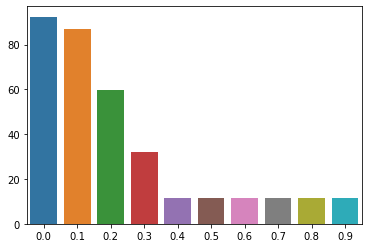

In [20]:
sns.barplot(drop_vals,acc_scores)